# 2. Energy densities of the target photon fields

Beside describing non-thermal emitters, `agnpy` contains classes describing the line and thermal emitters. They are gathered in the `agnpy.targets` module, as they represent target both for the *External Compton* and the $\gamma\gamma$ absorption processes.

In this tutorial, we will briefly examine the available targets and will compute their integral energy densities, $u [{\rm erg}\,{\rm cm}^{-3}]$, as a function of the distance from the jet axis.

In [1]:
# import numpy, astropy and matplotlib for basic functionalities
import numpy as np
import astropy.units as u
from astropy.constants import M_sun
from astropy.coordinates import Distance
import matplotlib.pyplot as plt

In [27]:
# import agnpy classes
from agnpy.spectra import PowerLaw
from agnpy.emission_regions import Blob
from agnpy.targets import (
    CMB,
    PointSourceBehindJet,
    SSDisk,
    SphericalShellBLR,
    RingDustTorus,
)
from agnpy.utils.plot import plot_sed, load_mpl_rc

load_mpl_rc()
u_label = r"$u\,/\,{\rm erg}\,{\rm cm}^{-3}$"
u_prime_label = r"$u'\,/\,{\rm erg}\,{\rm cm}^{-3}$"
r_label = r"$r\,/\,{\rm cm}$"

## 2.1. Targets available in `agnpy`

The following emitters are implemented in `agnpy.targets`:

* `CMB`, representing the cosmic microwave background; 
* `PointSourceBehindJet`, representing a monochromatic point-like source behind the jet, to be used mostly for consistency checks;
* `SSDisk`, representing a [Shakura & Sunyaev (1973)](https://ui.adsabs.harvard.edu/abs/1973A%26A....24..337S/abstract) accretion disc, modeled as a geometrically thin disk whose emission is parameterized following [Dermer & Schlickeiser (2002)](https://ui.adsabs.harvard.edu/abs/2002ApJ...575..667D/abstract) and [Dermer et al. (2009)](https://ui.adsabs.harvard.edu/abs/2009herb.book.....D/abstract); 
* `SphericalShellBLR`, representing a broad line region (BLR) simplified to an infinitesimally thin sphere reprocessing a fraction of the disc radiation in a monochromatic (line) emission (as in [Finke 2016](https://ui.adsabs.harvard.edu/abs/2016ApJ...830...94F/abstract));
* `RingDustTorus`, representing a dust torus (DT), simplified to a ring reprocessing a fraction of the disc radiation in a single-temperature black body (BB) emission (as in [Finke 2016](https://ui.adsabs.harvard.edu/abs/2016ApJ...830...94F/abstract)).

### 2.1.1. Shakura Sunyaev accretion disk

In order to define an accretion disk, we need to specify:
* the mass of its central black hole $M_{\rm BH}$;
* its total luminosity $L_{\rm disk}$;
* the fraction of gravitational energy converted to radiant energy $\eta$;
* the inner and outer radii, $R_{\rm in}$ and $R_{\rm out}$. We can express them directly as quantities in `cm`, or in units of the BH gravitational radius, $R_{\rm g}$.

In [3]:
M_BH = 1.2 * 1e9 * M_sun
L_disk = 2e46 * u.Unit("erg s-1")
eta = 1 / 12
R_tilde_in = 6
R_tilde_out = 200

disk = SSDisk(M_BH, L_disk, eta, R_tilde_in, R_tilde_out, R_g_units=True)

All the emitters in `agnpy` can be printed.

In [4]:
print(disk)

* Shakura Sunyaev accretion disk:
 - M_BH (central black hole mass): 2.39e+42 g
 - L_disk (disk luminosity): 2.00e+46 erg / s
 - eta (accretion efficiency): 8.33e-02
 - dot(m) (mass accretion rate): 2.67e+26 g / s
 - R_in (disk inner radius): 1.06e+15 cm
 - R_out (disk inner radius): 3.54e+16 cm


### 2.1.2. BLR
The BLR can be initialized specifying: 
* the luminosity of the disk whose radiation is being reprocessed, $L_{\rm disk}$; 
* the fraction of radiation reprocessed, $\xi_{\rm line}$; 
* the type of line emitted; 
* the radius at which the line is emitted, $R_{\rm line}$.

In [5]:
# quantities defining the BLR
xi_line = 0.024
R_line = 1.1e17 * u.cm

blr = SphericalShellBLR(L_disk, xi_line, "Lyalpha", R_line)

print(blr)

* Spherical Shell Broad Line Region:
 - L_disk (accretion disk luminosity): 2.00e+46 erg / s
 - xi_line (fraction of the disk radiation reprocessed by the BLR): 2.40e-02
 - line (type of emitted line): Lyalpha, lambda = 1.22e-05 cm
 - R_line (radius of the BLR shell): 1.10e+17 cm



In `agnpy`, all the emission lines of the emission lines of the stratified BLR model in [Finke
(2016)](https://ui.adsabs.harvard.edu/abs/2016ApJ...830...94F/abstract) are made available. They can be listed via the `SphericalShellBLR.print_lines_list()` function.

In [6]:
SphericalShellBLR.print_lines_list()

Lyepsilon: {'lambda': <Quantity 937.8 Angstrom>, 'R_Hbeta_ratio': 2.7, 'L_Hbeta_ratio': 0.24}
Lydelta: {'lambda': <Quantity 949.74 Angstrom>, 'R_Hbeta_ratio': 2.8, 'L_Hbeta_ratio': 0.24}
CIII: {'lambda': <Quantity 977.02 Angstrom>, 'R_Hbeta_ratio': 0.83, 'L_Hbeta_ratio': 0.6}
NIII: {'lambda': <Quantity 990.69 Angstrom>, 'R_Hbeta_ratio': 0.85, 'L_Hbeta_ratio': 0.6}
Lybeta: {'lambda': <Quantity 1025.72 Angstrom>, 'R_Hbeta_ratio': 1.2, 'L_Hbeta_ratio': 1.1}
OVI: {'lambda': <Quantity 1033.83 Angstrom>, 'R_Hbeta_ratio': 1.2, 'L_Hbeta_ratio': 1.1}
ArI: {'lambda': <Quantity 1066.66 Angstrom>, 'R_Hbeta_ratio': 4.5, 'L_Hbeta_ratio': 0.094}
Lyalpha: {'lambda': <Quantity 1215.67 Angstrom>, 'R_Hbeta_ratio': 0.27, 'L_Hbeta_ratio': 12}
OI: {'lambda': <Quantity 1304.35 Angstrom>, 'R_Hbeta_ratio': 4.0, 'L_Hbeta_ratio': 0.23}
SiII: {'lambda': <Quantity 1306.82 Angstrom>, 'R_Hbeta_ratio': 4.0, 'L_Hbeta_ratio': 0.23}
SiIV: {'lambda': <Quantity 1396.76 Angstrom>, 'R_Hbeta_ratio': 0.83, 'L_Hbeta_ratio': 1.

The shell emitting the $H\beta$ line (`"Hbeta"`) serves as a reference and all the other shells have luminosities and radii expressed as a fraction of the luminosity and radius of the $H\beta$-emitting one. 

### 2.1.3. Dust torus
The DT can be initialized specifying:
* the luminosity of the disk whose radiation is being reprocessed, $L_{\rm disk}$; 
* the fraction of radiation reprocessed, $\xi_{\rm DT}$;
* the temperature where the black-body spectrum peaks, $T_{\rm DT}$; 
* the radius of the ring representing the torus, $R_{\rm DT}$. 
The latter is optional and if not specified will be automatically set at the sublimation radius (Eq. 96 in [Finke (2016)](https://ui.adsabs.harvard.edu/abs/2016ApJ...830...94F/abstract)). 

Let us considering a DT reprocessing the disk luminosity in the infrared ($T_{\rm DT}=1000\,{\rm K}$).

In [7]:
# quantities defining the DT
T_dt = 1e3 * u.K
xi_dt = 0.1

dt = RingDustTorus(L_disk, xi_dt, T_dt)

print(dt)

* Ring Dust Torus:
 - L_disk (accretion disk luminosity): 2.00e+46 erg / s
 - xi_dt (fraction of the disk radiation reprocessed by the torus): 1.00e-01
 - T_dt (temperature of the dust torus): 1.00e+03 K
 - R_dt (radius of the torus): 1.57e+19 cm



## 2.2. Energy densities

Each target has a function returning its (integral) energy density $u [{\rm erg}\,{\rm cm}^{-3}]$, as a function of the distance from the jet axis. Let us plot the energy densities of the targets we created.

In [9]:
r = np.logspace(15, 21) * u.cm

u_disk = disk.u(r)
u_blr = blr.u(r)
u_dt = dt.u(r)

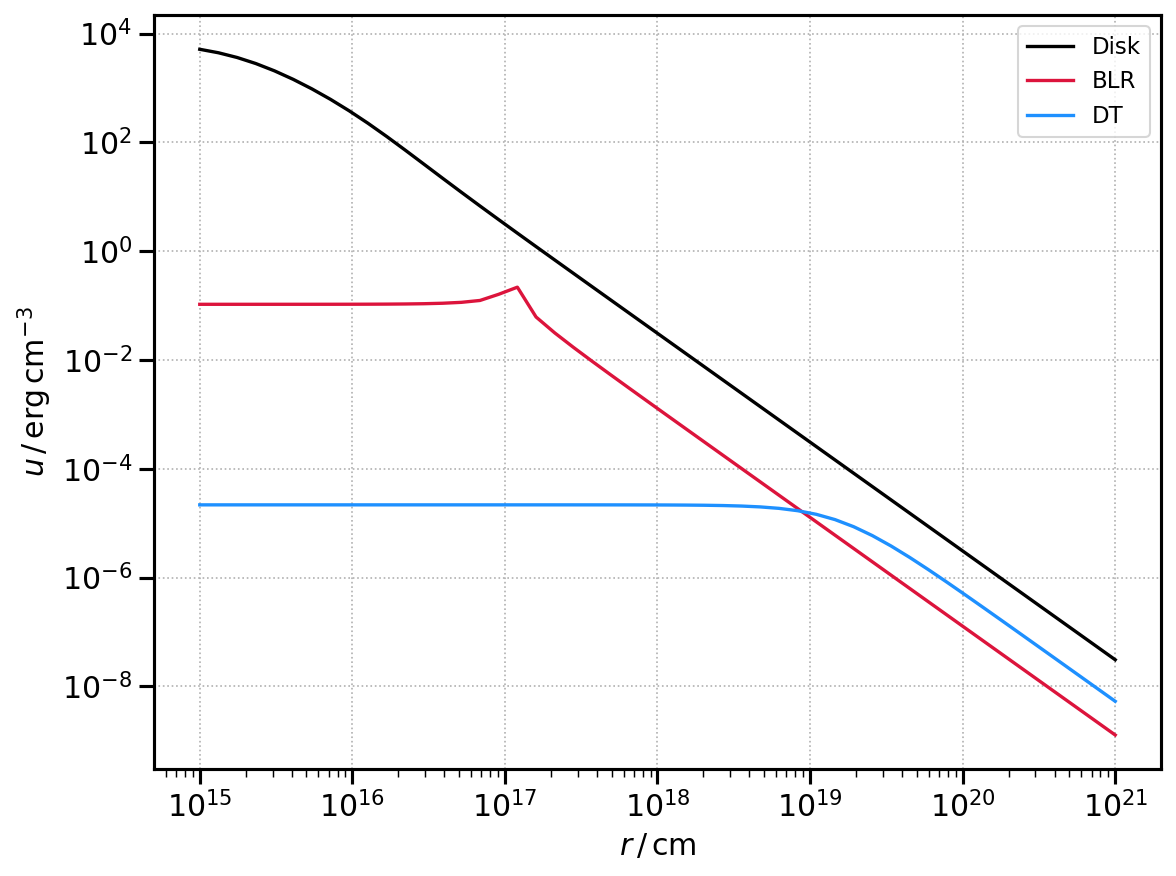

In [10]:
plt.loglog(r, u_disk, color="k", label="Disk")
plt.loglog(r, u_blr, color="crimson", label="BLR")
plt.loglog(r, u_dt, color="dodgerblue", label="DT")

plt.legend(fontsize=11)

plt.xlabel(r_label)
plt.ylabel(u_label)

plt.show()

The disk is so bright it overshines the photon fields of the two emitters pretty much at all distances.

This is true in the reference frame fixed at the galaxy center, what happens if we transform these energy densities to the reference frame of a blob streaming along the jet? 

We can address this question using `agnpy`, let us call again the `targets.u` function, this time passing along the distance, an instance of the `Blob` in which reference frame we want to compute the densities.

In [40]:
# electron distribution
n_e = PowerLaw(k=1e-2 * u.Unit("cm-3"), p=2.8, gamma_min=1e2, gamma_max=1e7)

# define the emission region and the radiative process
blob = Blob(R_b=1e16 * u.cm, z=0.5, delta_D=40, Gamma=40, B=1 * u.G, n_e=n_e)

In [41]:
# let us recompute the energy densities
u_prime_disk = disk.u(r, blob)
u_prime_blr = blr.u(r, blob)
u_prime_dt = dt.u(r, blob)

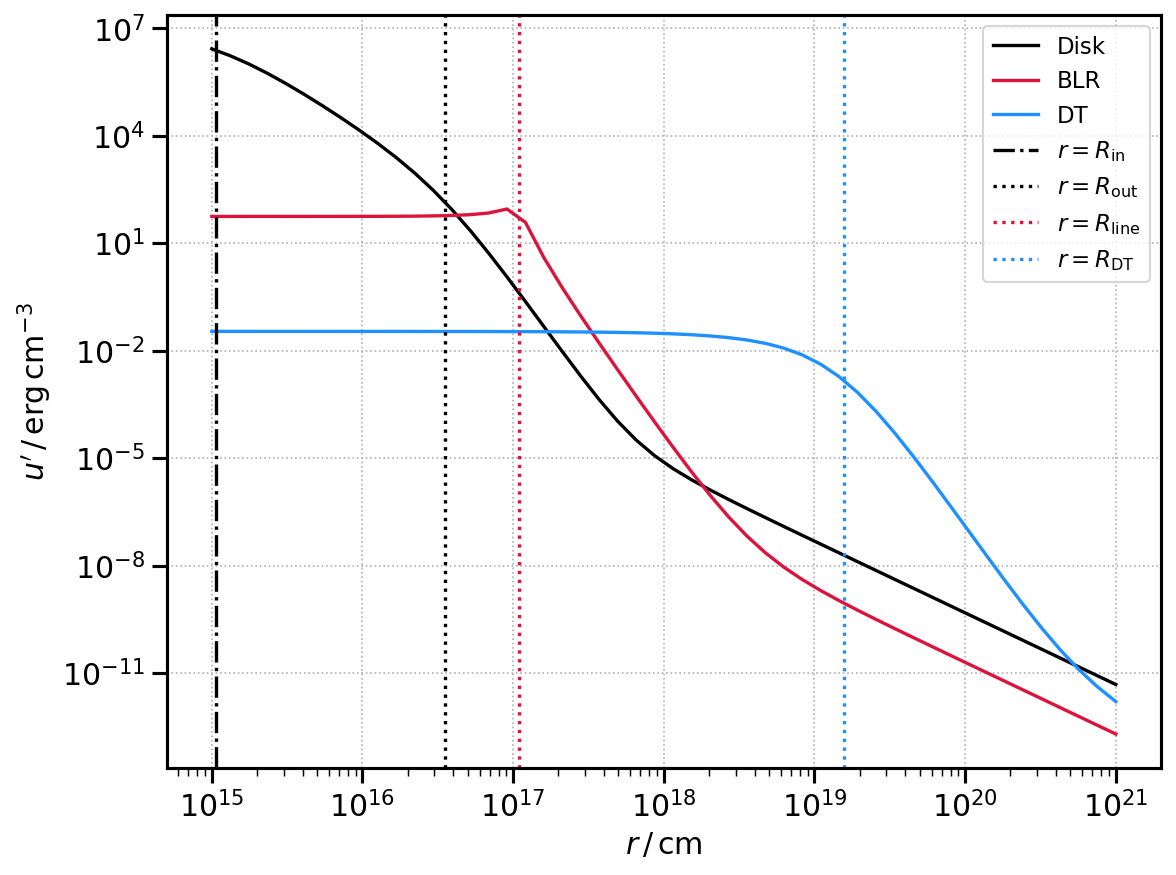

In [42]:
plt.loglog(r, u_prime_disk, color="k", label="Disk")
plt.loglog(r, u_prime_blr, color="crimson", label="BLR")
plt.loglog(r, u_prime_dt, color="dodgerblue", label="DT")

plt.axvline(disk.R_in.to_value("cm"), ls="-.", color="k", label=r"$r=R_{\rm in}$")
plt.axvline(disk.R_out.to_value("cm"), ls=":", color="k", label=r"$r=R_{\rm out}$")
plt.axvline(
    blr.R_line.to_value("cm"), ls=":", color="crimson", label=r"$r=R_{\rm line}$"
)
plt.axvline(dt.R_dt.to_value("cm"), ls=":", color="dodgerblue", label=r"$r=R_{\rm DT}$")


plt.legend(fontsize=11)

plt.xlabel(r_label)
plt.ylabel(u_prime_label)

plt.show()

As we expect, the energy density of the field of each component starts to fall as we pass its characteristic size. At a distance $\sim{\rm pc}$ away from the BH the only relevant photon field is that of the DT. 

Is there some other photon field we did not consider?   
Yes, externally to the AGN there is the CMB.    
Internally to the emission region there is the photon field produced by the synchrotron photons.

Let us compute and represent them.

In [43]:
# define the CMB and compute its energy denisty
cmb = CMB(z=blob.z)

u_prime_cmb = cmb.u(blob)

# compute the synchrotron photons energy density, it is an attribute of the Blob
u_prime_synch = blob.u_ph_synch

Let us plot all of them together.

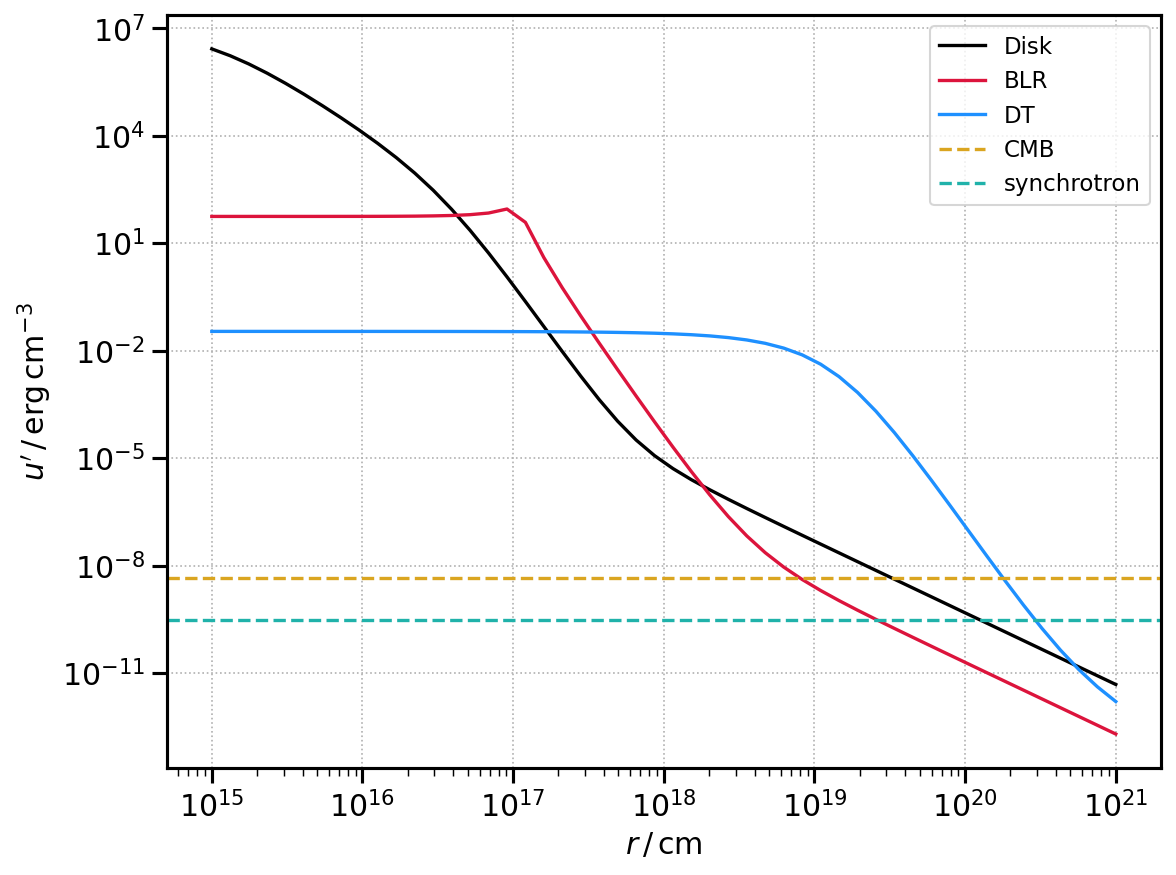

In [44]:
plt.loglog(r, u_prime_disk, color="k", label="Disk")
plt.loglog(r, u_prime_blr, color="crimson", label="BLR")
plt.loglog(r, u_prime_dt, color="dodgerblue", label="DT")
plt.axhline(u_prime_cmb.to_value("erg cm-3"), ls="--", color="goldenrod", label="CMB")
plt.axhline(
    u_prime_synch.to_value("erg cm-3"),
    ls="--",
    color="lightseagreen",
    label="synchrotron",
)

plt.legend(fontsize=11)

plt.xlabel(r_label)
plt.ylabel(u_prime_label)

plt.show()

As we can see, beyond $\sim 100\,{\rm pc}$ the CMB is the photon field external to the AGN with the highest energy density.

## 2.3. Thermal radiation of the emitters

The SEDs due to the black-body (BB) emission of the disk and the DT can be computed via the `sed_flux` members of the two classes. A multi-temperature BB is considered for the disk and a simple single-temperature BB for the DT. An array of frequencies over which to compute the SED and the redshift of the galaxy have to be specified to the `sed_flux` function.

**Note:** these BB SEDs approximate the actual thermal emission and are conventionally adopted in radio-to-gamma-ray MWL modelling to check the flux level of the thermal components against the dominant non-thermal ones. They are inadequate for precise modelling of the SED of those sources in which the thermal components can be directly observed (in particular non-jetted AGN).

/Users/cosimo/software/miniconda3/envs/gammapy-1.0/lib/python3.9/site-packages/astropy/units/quantity.py:614: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/cosimo/software/miniconda3/envs/gammapy-1.0/lib/python3.9/site-packages/astropy/units/quantity.py:614: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/cosimo/software/miniconda3/envs/gammapy-1.0/lib/python3.9/site-packages/astropy/units/quantity.py:614: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


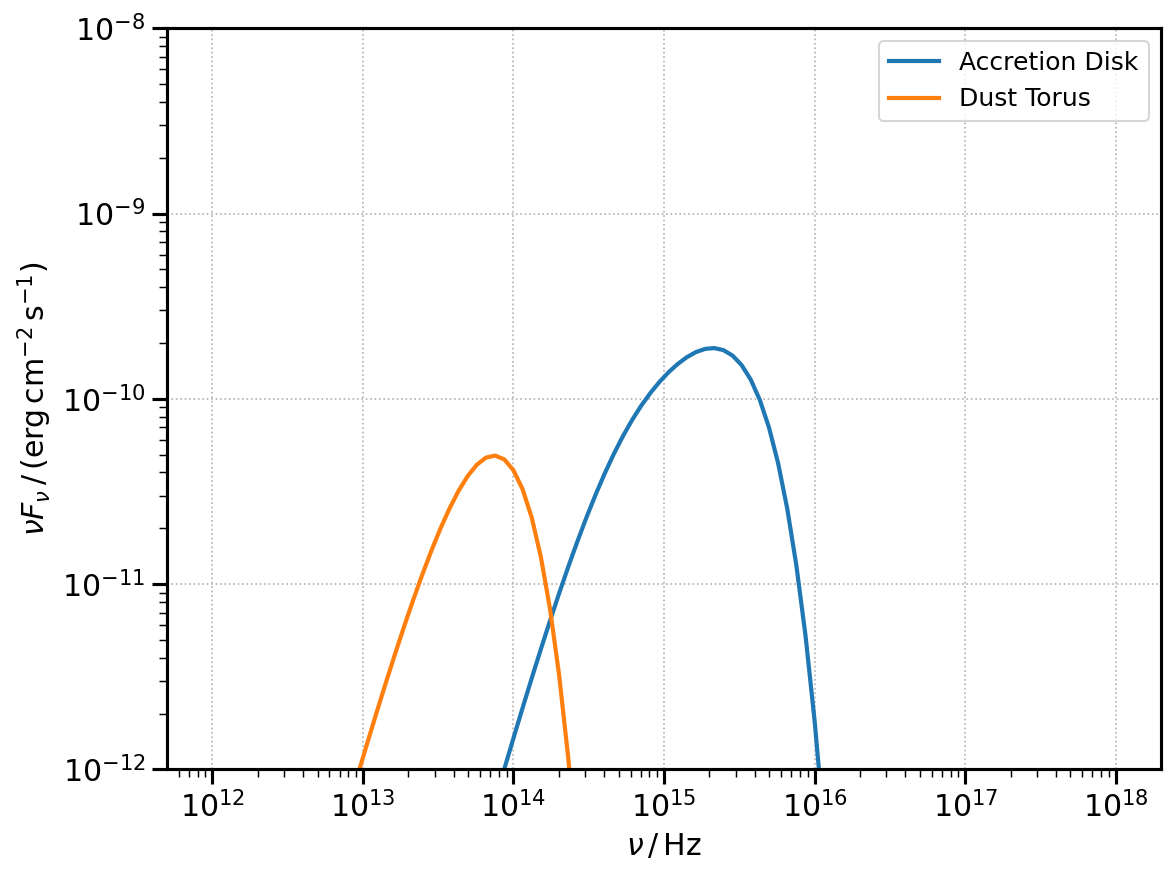

In [16]:
# array of frequencies to compute the SEDs
nu = np.logspace(12, 18, 100) * u.Hz

# compute the SEDs
disk_bb_sed = disk.sed_flux(nu, z=0.1)
dt_bb_sed = dt.sed_flux(nu, z=0.1)

# plot them
plot_sed(nu, disk_bb_sed, lw=2, label="Accretion Disk")
plot_sed(nu, dt_bb_sed, lw=2, label="Dust Torus")
plt.ylim([1e-12, 1e-8])
plt.show()

## 2.4. Exercises

### 2.4.1. Compton cooling

In the Thomson regime, the Compton energy losses can be expressed via the formula

\begin{equation}
\left(\frac{{\rm d}E'}{{\rm d}t}\right)_{\rm cool} = \frac{4}{3}\sigma_{\rm T} c u' \gamma'^2
\end{equation}

where $\sigma_{\rm T}$ is the Thomson cross section, $c$ the speed of light, $u'$ the integral energy density, and $\gamma'$ the Lorentz factor of the electron. Note that all quantities are computed in the reference frame co-moving with the blob.

Considering the blob and the emitters we defined, and considering that the electrons are cooling via inverse Compton (either SSC or EC). Considering a fixed energy $\gamma'$:

1. which type of inverse Compton, on which target field, is dominating the cooling at $r=10^{19}\,{\rm cm}$?

2. and at $r=5 \times 10^{21}\,{\rm cm}$?

### 2.4.2. Approximating a photon field with that of a point source behind the jet

As explained in the beginning, the point-like source behind the jet (`PointSourceBehindJet`) is mostly used for cross checks.
For large distances from the BH, typically much larger than the emitter size, $r >> R_{\rm emitter}$, the photon field of the emitter can be approximated by the one produced by a point source behind the blob.

Show that the energy distribution of the BLR in the blob frame ($u'$), tends to the one of a point source approximating it for distances $r > R_{\rm line}$.

**Suggestion:** define a `PointSourceBehindJet` with the same luminosity of the BLR and emitting the same energy of the line.